# One-vs-all logistic regression
###  - loading data 

In [266]:
%matplotlib inline
#%load_ext autotime

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OC-+TAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit #Vectorized sigmoid function


data = scipy.io.loadmat('data/ex3data1.mat')
data
x = np.array(data['X'])
x = np.insert(x,0,1,axis=1)
print(x.shape)
y = np.array(data['y'])
print(y.shape)

(5000, 401)
(5000, 1)


## This is display function provided by Andrew Ng adapted for python

In [268]:
def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x400,
    crates an image object from it, and returns it
    """
    width, height = 20, 20
    square = row[1:].reshape(width,height)
    return square.T
    
def displayData(indices_to_display = None):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(x.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(x[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)

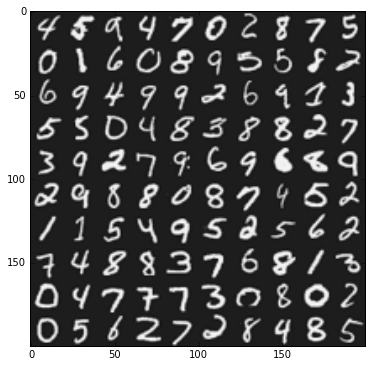

In [269]:
displayData()

In [270]:
def init_theta():
    theta = np.random.rand(10,1)*2*0.12-0.12
    return theta

theta = init_theta()
print(theta)

[[ 0.00838471]
 [-0.07752615]
 [ 0.10310881]
 [-0.08906229]
 [ 0.07401597]
 [ 0.03643645]
 [-0.07155195]
 [-0.04042642]
 [ 0.09748643]
 [-0.10860998]]


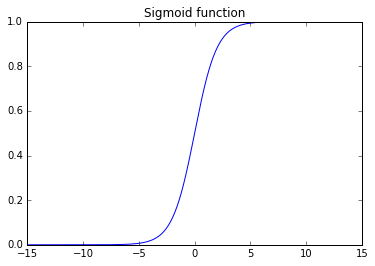

In [271]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
xs = np.arange(-15,15,0.01)
ys = sigmoid(xs)
plt.plot(xs,ys)
plt.title("Sigmoid function")
plt.show()

In [272]:
print("Dimensions of parameters")
print("X",x.shape)
print("Y",y.shape)
print("Theta",theta.shape)

Dimensions of parameters
X (5000, 401)
Y (5000, 1)
Theta (10, 1)


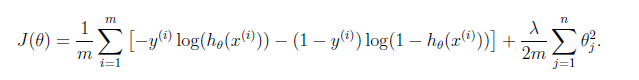

In [273]:
from IPython.display import Image
Image(filename='data/regularized_cost_function.png')

In [274]:
def cost_function(theta, lambda_val,x,y):
    h = sigmoid(x.dot(theta))
    m = len(x)
    first_term = y.T.dot(np.log(h))
    second_term = (1-y).T.dot((np.log(1-h)))
    lambda_term = (lambda_val/(2*m))*((theta**2).sum())
    val = (-1/m)*(first_term + second_term) + lambda_term
    return val[0]

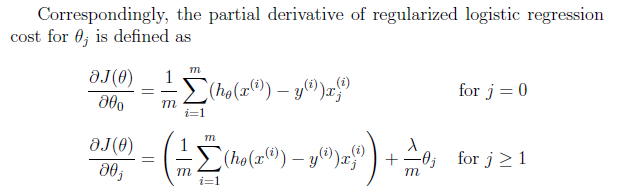

In [275]:
Image(filename='data/gradient.png')

In [276]:
def gradient(theta, lambda_val, X,y):
    m = y.size
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    grad = (1/m)*X.T.dot(h-y) + (lambda_val/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return grad.flatten()

In [277]:
initial_theta = np.zeros((x.shape[1],1))  # 401x1

cost_val = cost_function(initial_theta,10,x,y)
print(cost_val)
sol = gradient(theta,2,x,y)
print(sol.shape)

from scipy import optimize
res = optimize.minimize(cost_function, initial_theta, args=(4, x, (y == 1)*1), method=None,
                       jac=gradient, options={'maxiter':50})
print(res.x.shape)

[ 160.39425758]


ValueError: shapes (5000,401) and (10,1) not aligned: 401 (dim 1) != 10 (dim 0)

In [278]:
alpha=0.001
iterations = 1500
lambda_val = 0

def gradient_descent(x,y,theta,lambda_val):
    m = len(x)
    for i in range (iterations):
        theta = theta - gradient(theta,lambda_val,x,y)
    return theta


In [279]:
def one_vs_all():
    dataset = len(x)
    features = len(x[0])
    all_theta = np.zeros((10,features)) #10x401
    print(all_theta)
    for i in range(1,11):
        #print("Started with ",i)
        y_i = np.array([int(label == i) for label in y])
        y_i = y_i.reshape(len(y_i),1)
        temp_theta = optimize.minimize(cost_function, initial_theta, args=(4, x, (y == i)*1), method=None,
                       jac=gradient, options={'maxiter':50}).x
        all_theta[i-1] = temp_theta.flatten()
        
    return all_theta

In [280]:
all_thetas = one_vs_all()
result = sigmoid(x.dot(all_thetas.T))
print('This is how the result looks like for x = 0 ie the first data point x')
print(result[0])
print('This is how the result looks like for x = 100 ie the hundredth data point x')
print(result[100])


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
This is how the result looks like for x = 0 ie the first data point x
[  4.90149422e-07   1.06253056e-03   6.58419428e-04   1.47817845e-06
   4.18063516e-03   4.21976684e-04   1.37886597e-03   3.04270593e-04
   7.98919891e-04   9.90742734e-01]
This is how the result looks like for x = 100 ie the hundredth data point x
[  5.22575581e-06   3.05930389e-01   2.08233504e-03   9.73014997e-07
   1.11099015e-02   9.83782883e-04   1.53330436e-05   5.83971994e-02
   1.42141405e-05   8.56595923e-01]


In [281]:
print('We then get the index of the cell with highest probability, \nwhich means we choose the classifier which is the surest\n')

best = np.argmax(result,axis = 1)+1
print("So for the first cell the predicted value is best[0],\nbecause the last cell has the highest probability inside\n")
print("So then for the 100th cell the predicted value is", best[100],'\n')
print('In total, Training set accuracy: {} %'.format(np.mean(best == y.ravel())*100))


We then get the index of the cell with highest probability, 
which means we choose the classifier which is the surest

So for the first cell the predicted value is best[0],
because the last cell has the highest probability inside

So then for the 100th cell the predicted value is 10 

In total, Training set accuracy: 92.72 %


In [282]:
print('This is the distribution of our predicted data values')
L = np.zeros(10)
for i in best:
    L[i-1] += 1
print(L)

This is the distribution of our predicted data values
[ 523.  477.  481.  499.  486.  513.  504.  504.  500.  513.]


# Neural network forward propagation

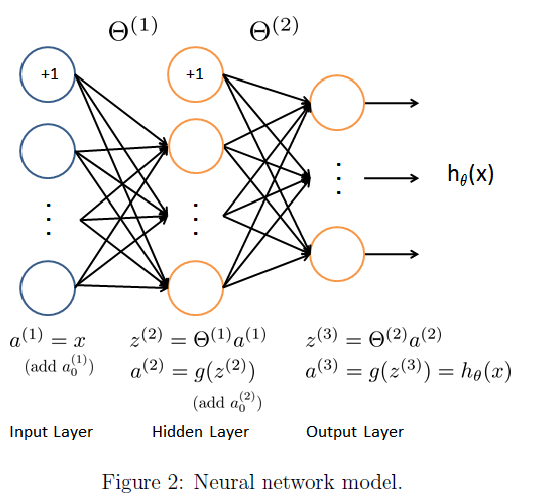

In [283]:
Image(filename='data/neural_net.png')

In [284]:
d = scipy.io.loadmat('data/ex3weights')
theta1 = d['Theta1'].T
theta2 = d['Theta2'].T
a1 = x
z2 = a1.dot(theta1)
a2 = sigmoid(z2)
a2 = np.insert(a2, obj=0, values=1, axis=1)
z3 = a2.dot(theta2)
a3 = sigmoid(z3)
#np.argmax returns the index of element with highest value
# we add +1 because it is indexed 0-9 and our actual data is 1-10
best = np.argmax(a3,axis=1)+1
# this is a numpy hack
sol = np.mean(best == y.ravel())
print("We matched",sol*100,"%")

We matched 97.52 %
